In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import math

/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_826/2369587490.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  max_temps = pd.concat([max_temps, pd.DataFrame([sorted_by_countries.iloc[0].values], columns=["Year", "Country", "Temperature"])], axis=0,ignore_index=True)
/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_826/2369587490.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  min_temps = pd.concat([min_temps, pd.DataFrame([sorted_by_countries.iloc[-1].values], col

Text(0.5, 1.0, 'Max and Min Temperatures by Country')

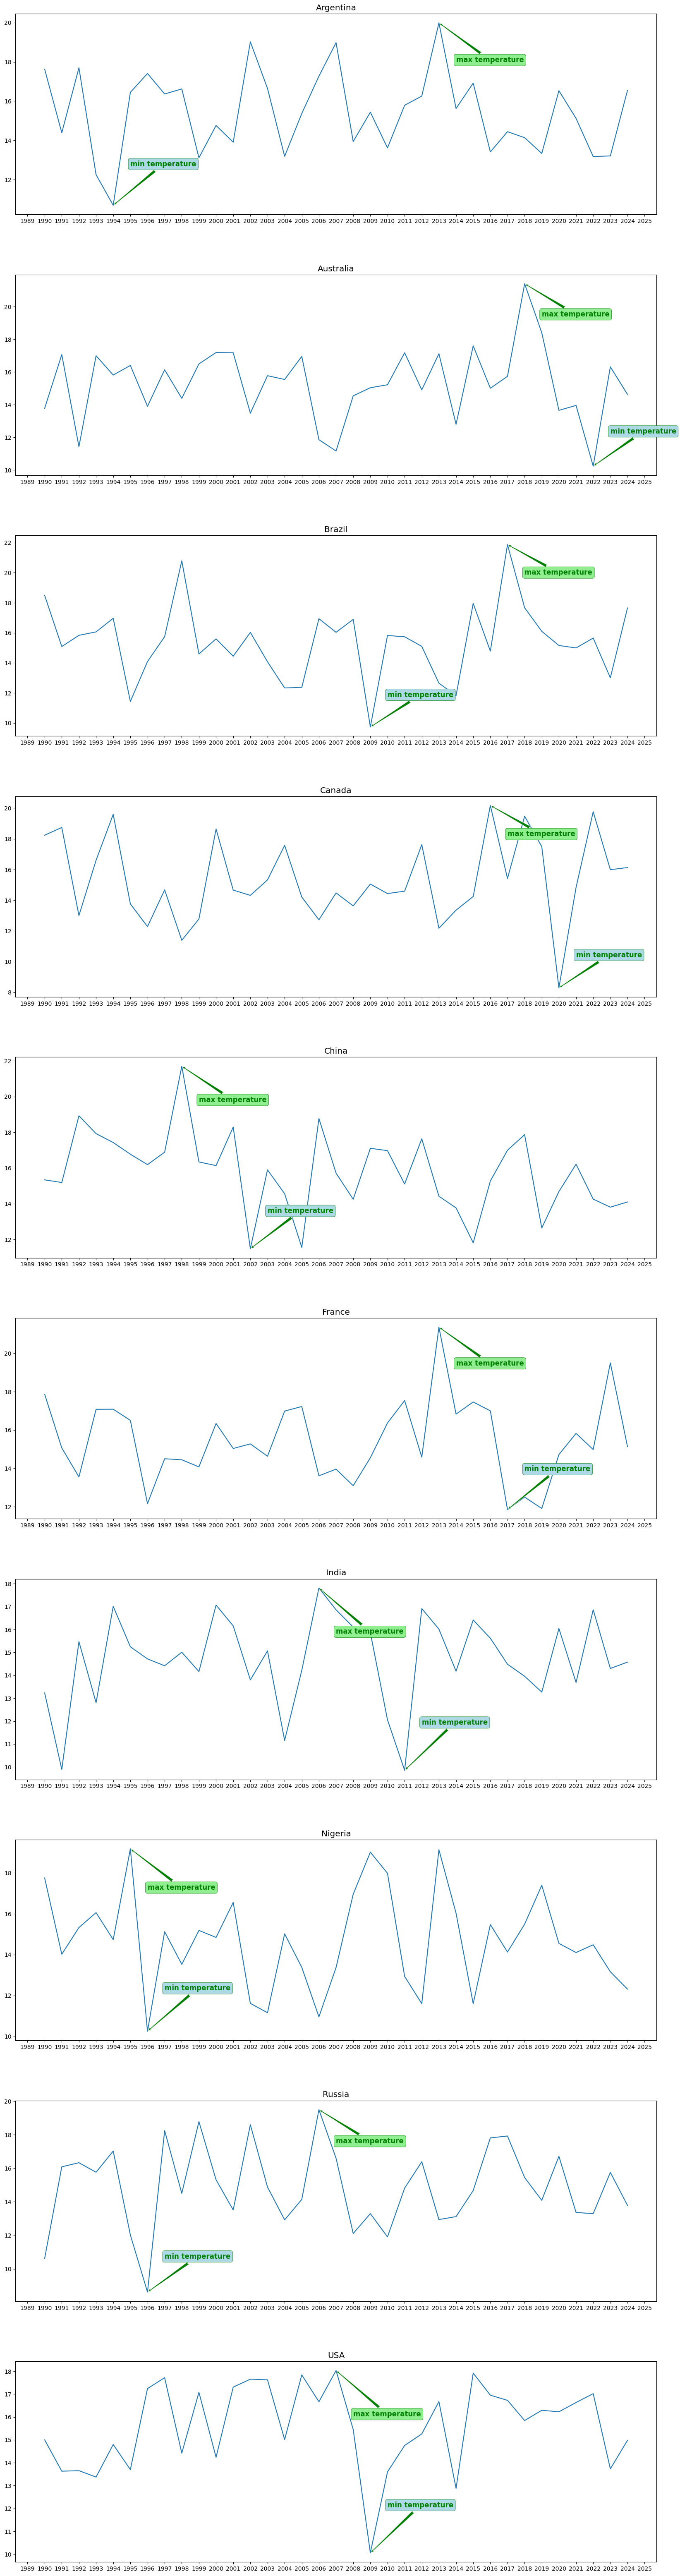

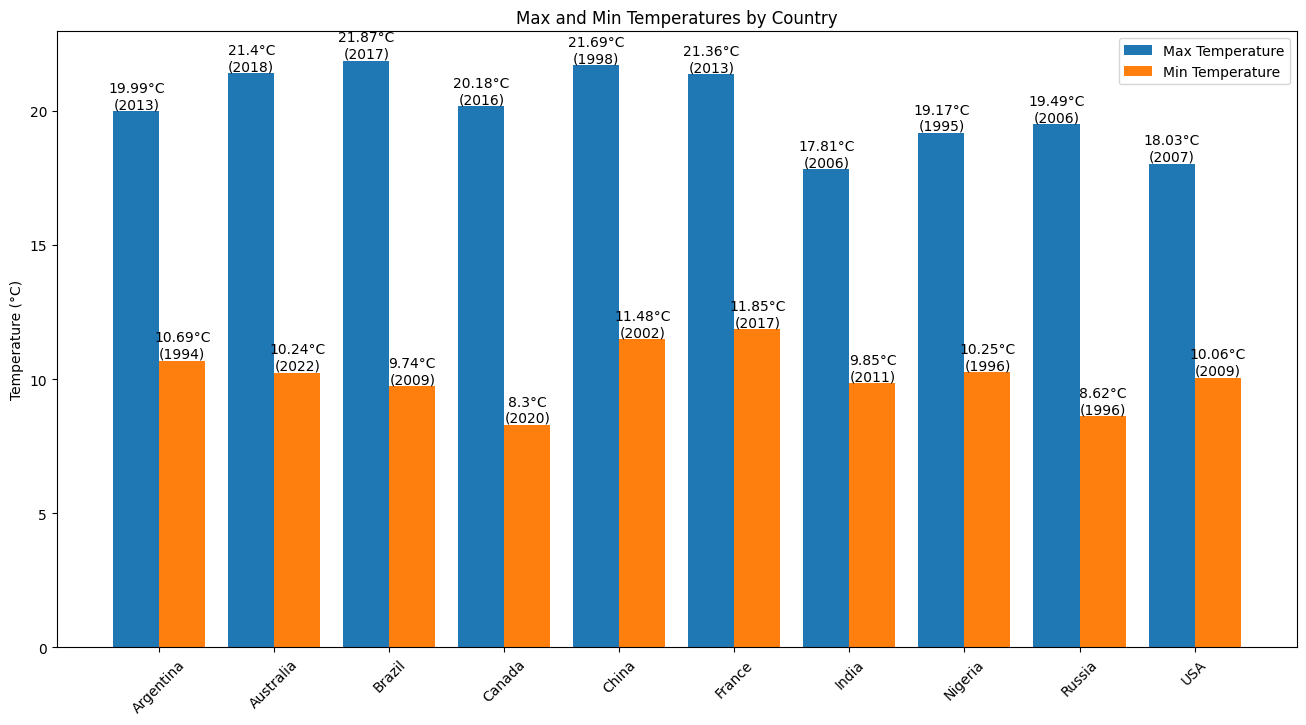

In [49]:
df = pd.read_csv("climate_change.csv")
by_countries = df.pivot_table("Average_Temperature_C",index=["Country","Year"],aggfunc=("mean")).unstack()

plots_size = by_countries.shape[0]
# by_countries
grid = plt.GridSpec(plots_size,1,hspace=0.3)
fig = plt.figure(figsize=(20,80))

max_temps = pd.DataFrame([],columns=["Year","Country","Temperature"])
min_temps = pd.DataFrame([],columns=["Year","Country","Temperature"])


# plots_size
plots = list()
for i in range(plots_size):
    
    plots.append(fig.add_subplot(grid[i]))

for i in range(plots_size):
    country = by_countries.iloc[i].unstack().T
    sorted_by_countries = by_countries.iloc[i].reset_index()
    sorted_by_countries = sorted_by_countries.sort_values(by=by_countries.index[i],ascending=False)
    maximum = sorted_by_countries.iloc[0,1:].copy()
    minimum = sorted_by_countries.iloc[-1,1:].copy()
    sorted_by_countries = sorted_by_countries.drop(columns=sorted_by_countries.columns[0])
    sorted_by_countries["Country"] = by_countries.index[i]
    sorted_by_countries["Temperature"] = sorted_by_countries[by_countries.index[i]]
    sorted_by_countries.drop(columns = by_countries.index[i],inplace=True)
    max_temps = pd.concat([max_temps, pd.DataFrame([sorted_by_countries.iloc[0].values], columns=["Year", "Country", "Temperature"])], axis=0,ignore_index=True)
    min_temps = pd.concat([min_temps, pd.DataFrame([sorted_by_countries.iloc[-1].values], columns=["Year", "Country", "Temperature"])], axis=0,ignore_index=True)
    with plt.style.context('ggplot'):
        plots[i].annotate('max temperature', xy=(maximum["Year"],maximum[by_countries.index[i]] ), xytext=(maximum["Year"]+1,maximum[by_countries.index[i]]-2),
                 fontsize=12, fontweight='bold', color='green', 
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='green', facecolor='lightgreen'),
                 arrowprops=dict(facecolor='green', arrowstyle='fancy'))
        plots[i].annotate('min temperature', xy=(minimum["Year"],minimum[by_countries.index[i]]), xytext=(minimum["Year"]+1,minimum[by_countries.index[i]]+2),
                 fontsize=12, fontweight='bold', color='green', 
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='green', facecolor='lightblue'),
                 arrowprops=dict(facecolor='green', arrowstyle='fancy'))
        plots[i].plot(country.index,country["Average_Temperature_C"])
        plots[i].set_title(by_countries.index[i])
        plots[i].xaxis.set_major_locator(plt.MultipleLocator(1))




main_fig, main_ax = plt.subplots(figsize=(16,8))

bar_w = 0.4

x = np.arange(len(max_temps["Country"]))

# Plot max temperatures with an offset to the left
bars_max = main_ax.bar(x - bar_w/2, max_temps["Temperature"], width=bar_w, label="Max Temperature")

# Plot min temperatures with an offset to the right
bars_min = main_ax.bar(x + bar_w/2, min_temps["Temperature"], width=bar_w, label="Min Temperature")

# Set country names as x-axis labels
main_ax.set_xticks(x)
main_ax.set_xticklabels(max_temps["Country"], rotation=45)

for i, bar in enumerate(bars_max):
    yval = bar.get_height()
    year = max_temps["Year"].iloc[i]
    main_ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}°C\n({year})', 
                 ha='center', va='bottom', fontsize=10, color='black')

for i, bar in enumerate(bars_min):
    yval = bar.get_height()
    year = min_temps["Year"].iloc[i]
    main_ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}°C\n({year})', 
                 ha='center', va='bottom', fontsize=10, color='black')

# Add legend and labels
main_ax.legend()
main_ax.set_ylabel("Temperature (°C)")
main_ax.set_title("Max and Min Temperatures by Country")




Text(0.5, 1.0, 'Percipitation Chart Bar')

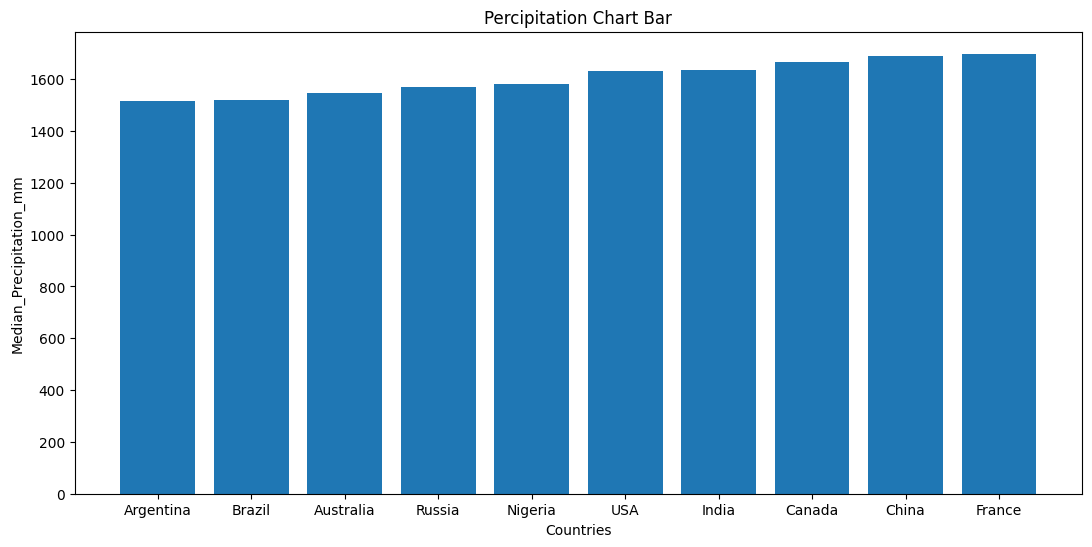

In [50]:
by_countries = df.pivot_table("Total_Precipitation_mm", index="Country", aggfunc=["median"])
by_countries = by_countries.sort_values(by=by_countries.columns[0])

plt.figure(figsize=(13, 6))
plt.bar(by_countries.index,by_countries.iloc[:, 0].values, width=0.8)
plt.xlabel('Countries')
plt.ylabel('Median_Precipitation_mm')
plt.title('Percipitation Chart Bar')

# Average Temperatures by Country

### The code retrieves country names and their average temperatures from a DataFrame, adjusts the naming for consistency, and fetches latitude and longitude data for relevant countries.

### It then loads a shapefile containing country boundaries, maps the average temperatures onto the geographical data, and filters for the selected countries.

### Finally, it creates a map that visually represents the average temperatures with a color bar for reference.

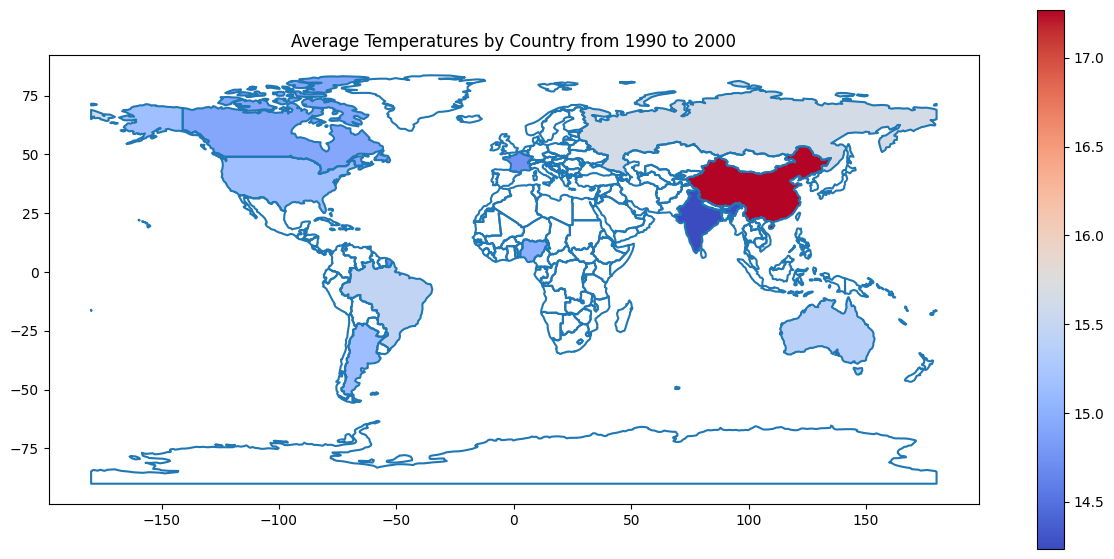

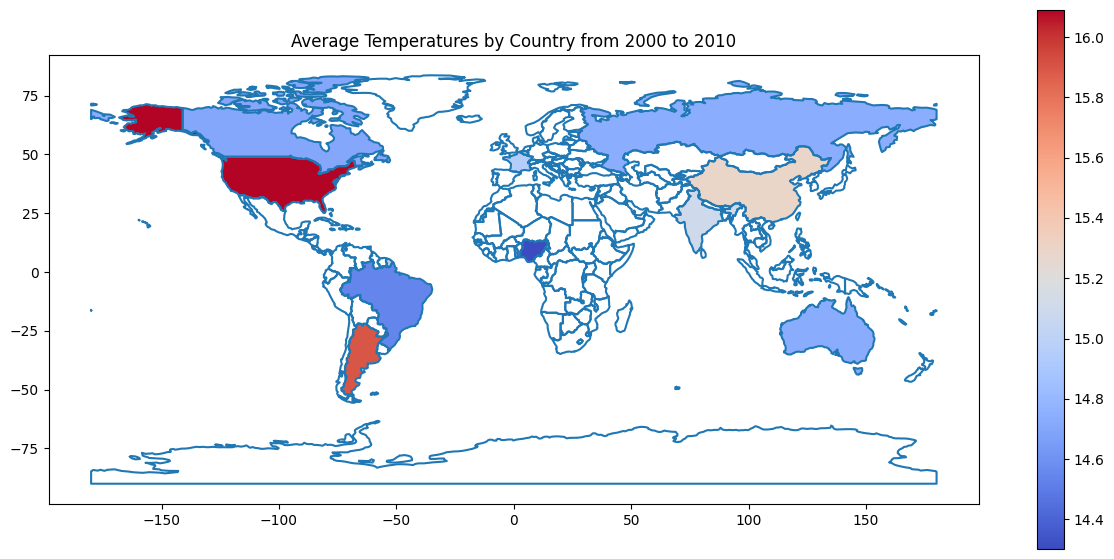

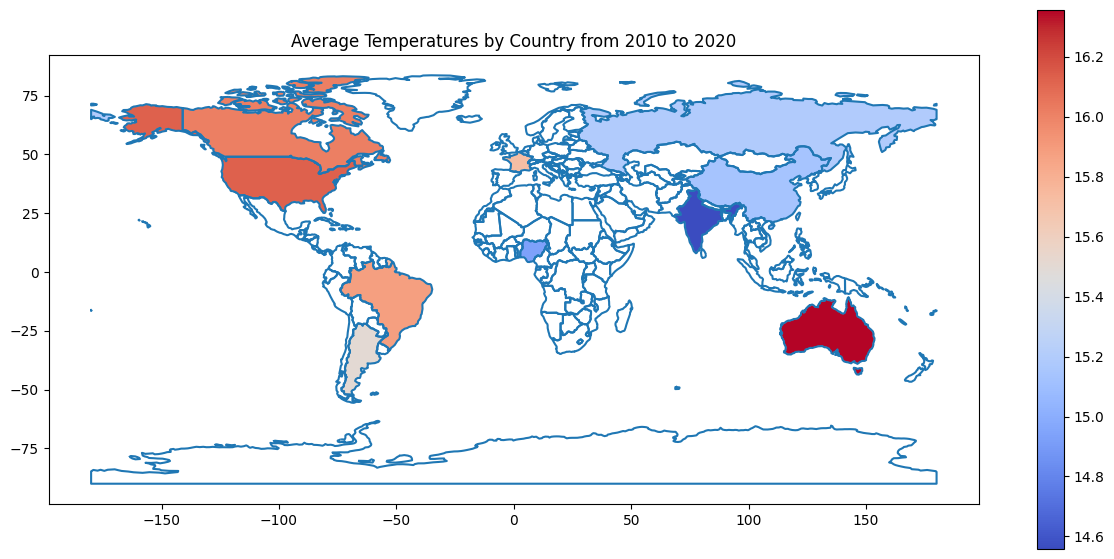

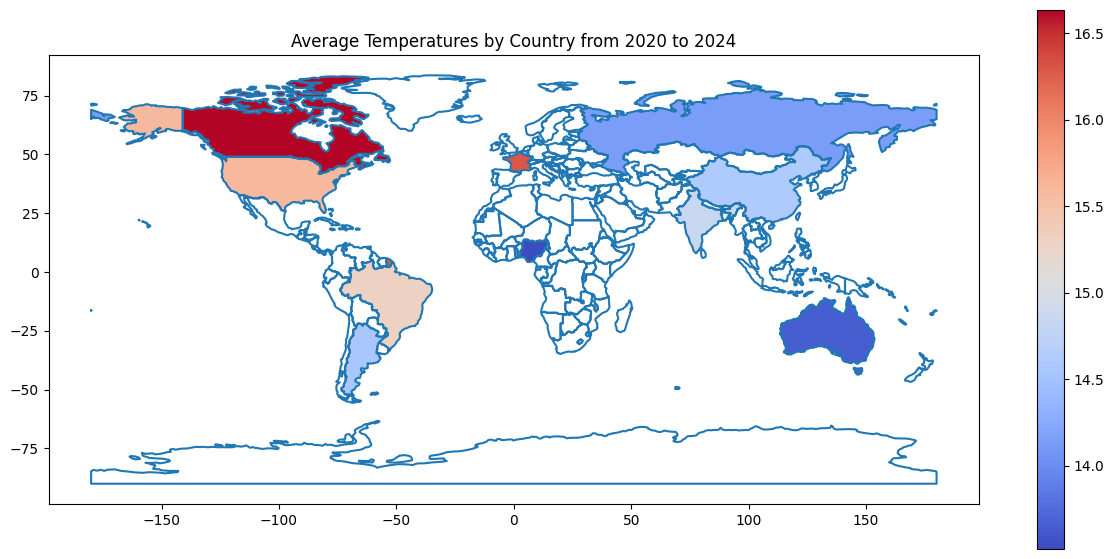

In [51]:
countries = df['Country'].unique()
countries_series = pd.Series(countries)

countries_coords = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/61b2107766d6fd51e2bd02d9f78f6be081340efc/countries_codes_and_coordinates.csv')

filtered_countries_coords = countries_coords[countries_coords['Country'].isin(countries_series)]
filtered_countries_coords = filtered_countries_coords[['Country', 'Latitude (average)', 'Longitude (average)']].reindex()
cleaned_countries_coords = filtered_countries_coords.set_index('Country')

years_in_total = df['Year'].sort_values().unique()
decades = years_in_total[::10]
max_year = years_in_total[-1]

changed_df = df.replace('USA', 'United States of America')
shapefile_path = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

for decade_index in range(len(decades)):
    try:
        countries_by_decade = changed_df[(changed_df['Year'] > decades[decade_index]) & (changed_df['Year'] < decades[decade_index + 1])]
    except IndexError:
        countries_by_decade = changed_df[changed_df['Year'] > decades[decade_index]]

    country_temperatures = pd.pivot_table(countries_by_decade, values=['Average_Temperature_C'], index=['Country'],
                                aggfunc="mean").to_dict()['Average_Temperature_C']
    
    world = gpd.read_file(shapefile_path)
    world['avg_temp'] = world['NAME'].map(country_temperatures)
    world[world['NAME'].isin(countries_series)]

    fig, ax = plt.subplots(1, 1, figsize=(15, 7))

    world.boundary.plot(ax=ax)
    world.plot(column='avg_temp', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=min(country_temperatures.values()), vmax=max(country_temperatures.values())))
    sm.set_array([])

    try:
        plt.title(f'Average Temperatures by Country from {decades[decade_index]} to {decades[decade_index + 1]}')
    except IndexError:
        plt.title(f'Average Temperatures by Country from {decades[decade_index]} to {max_year}')
    
    plt.show()



Country   Argentina   Australia      Brazil      Canada       China  \
decade                                                                
1990     4722.60325  4943.18500  4616.90500  5190.67325  4695.80275   
2000     4633.88100  4733.95475  4168.01425  4756.47025  5342.67700   
2010     5020.78175  4834.42325  4662.43275  4710.84750  4863.16625   
2020     4409.02000  5080.23000  5165.78500  4146.01700  4976.96900   

Country      France       India      Nigeria      Russia        USA  
decade                                                               
1990     4269.69000  4718.50250  4899.542750  4472.95975  4619.8470  
2000     4794.72075  5260.90325  5068.291750  4189.40600  4884.5650  
2010     4551.00550  4981.88350  5676.154917  5303.31450  5215.2775  
2020     5200.89450  5102.32100  4984.311000  4076.32600  4877.5660

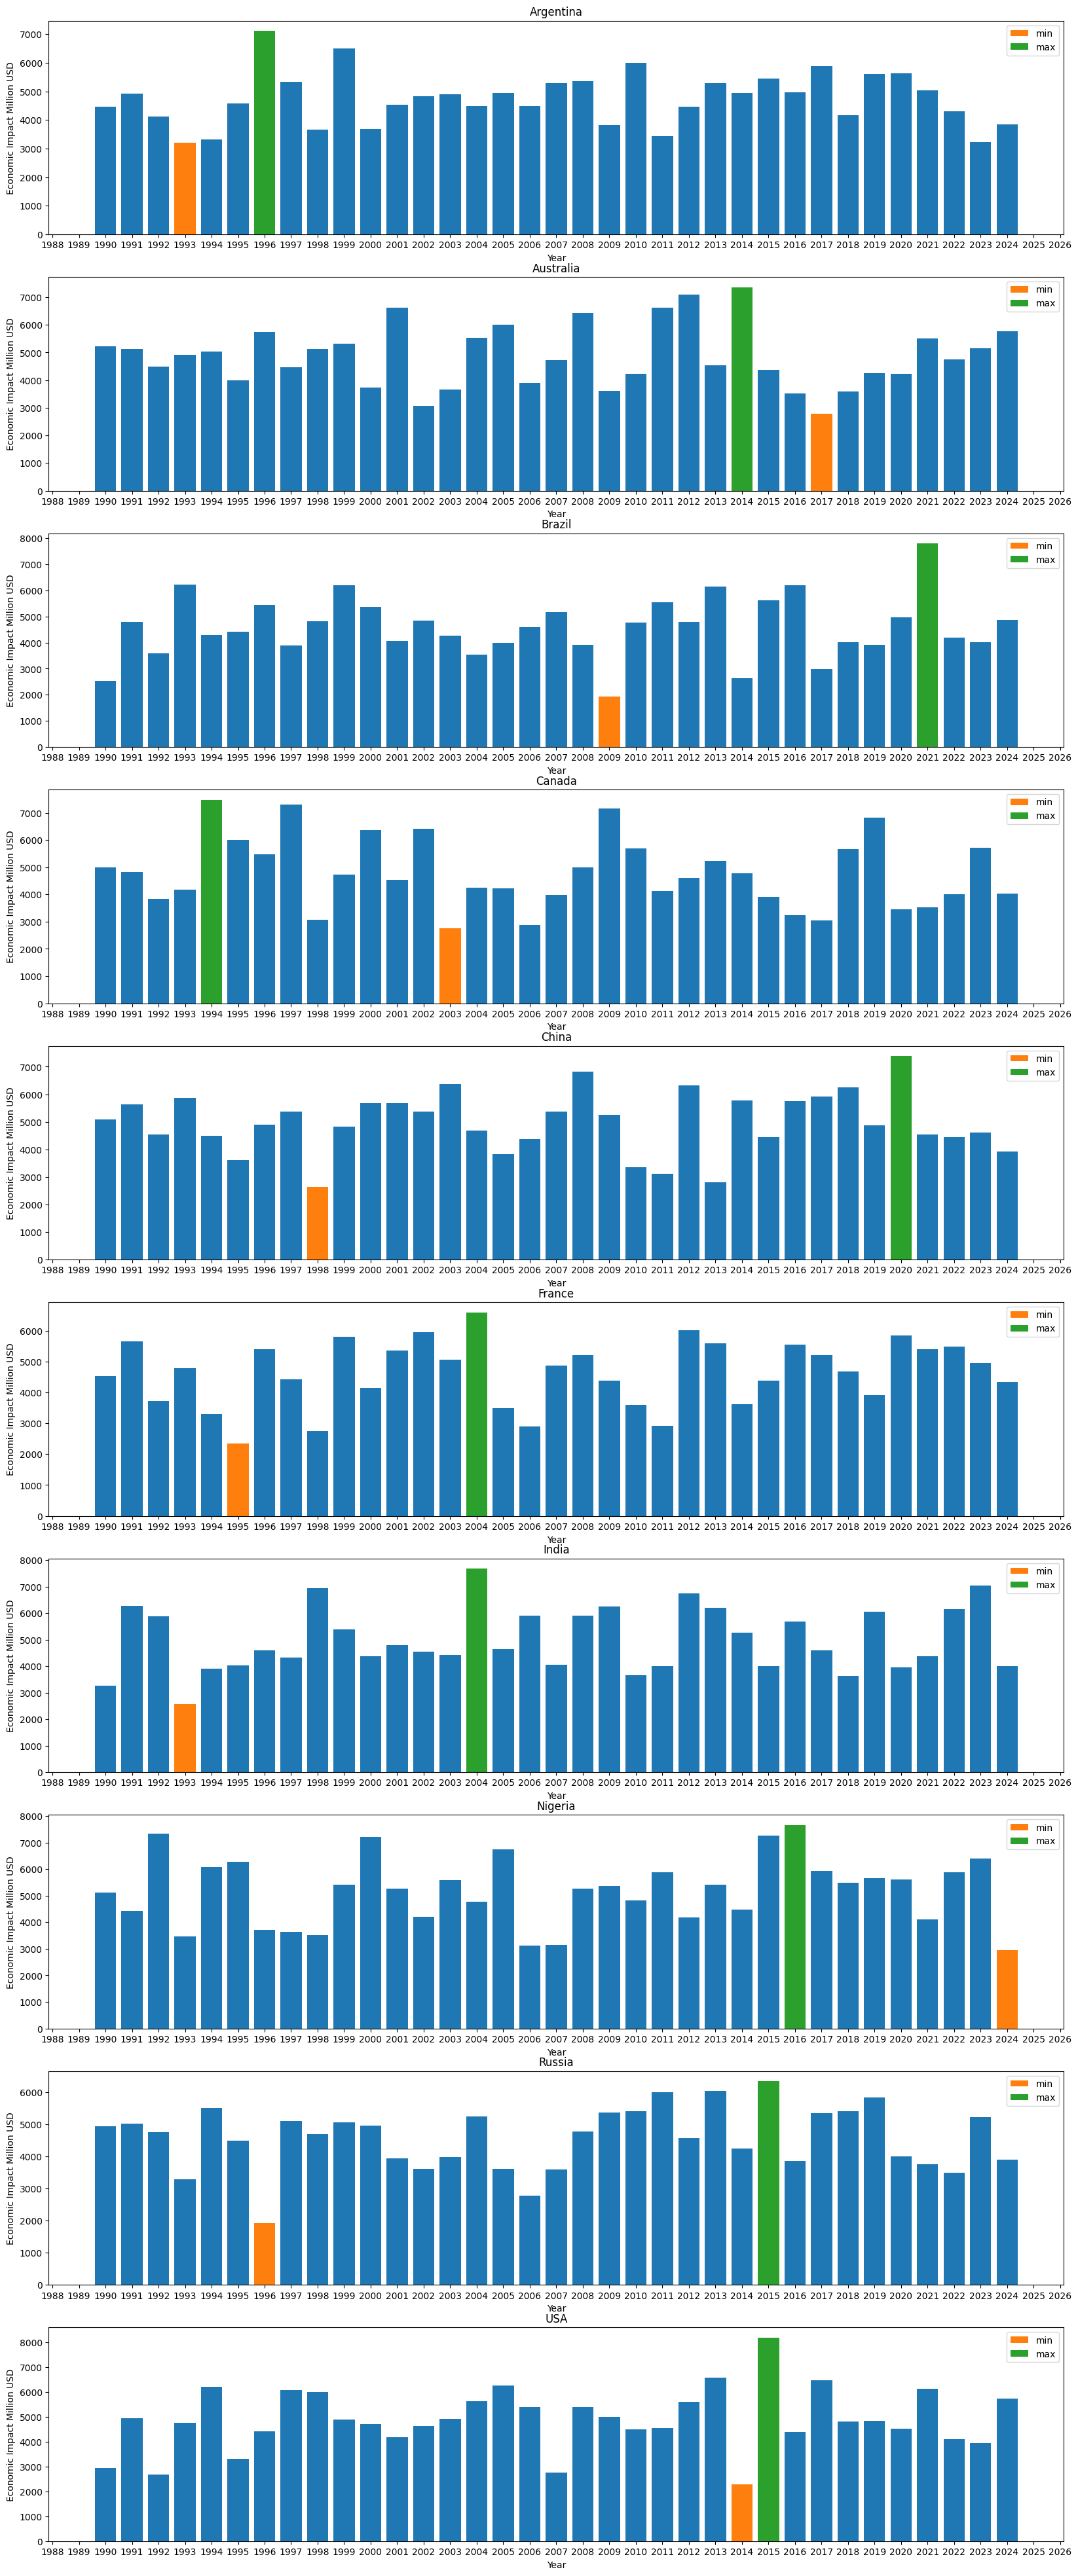

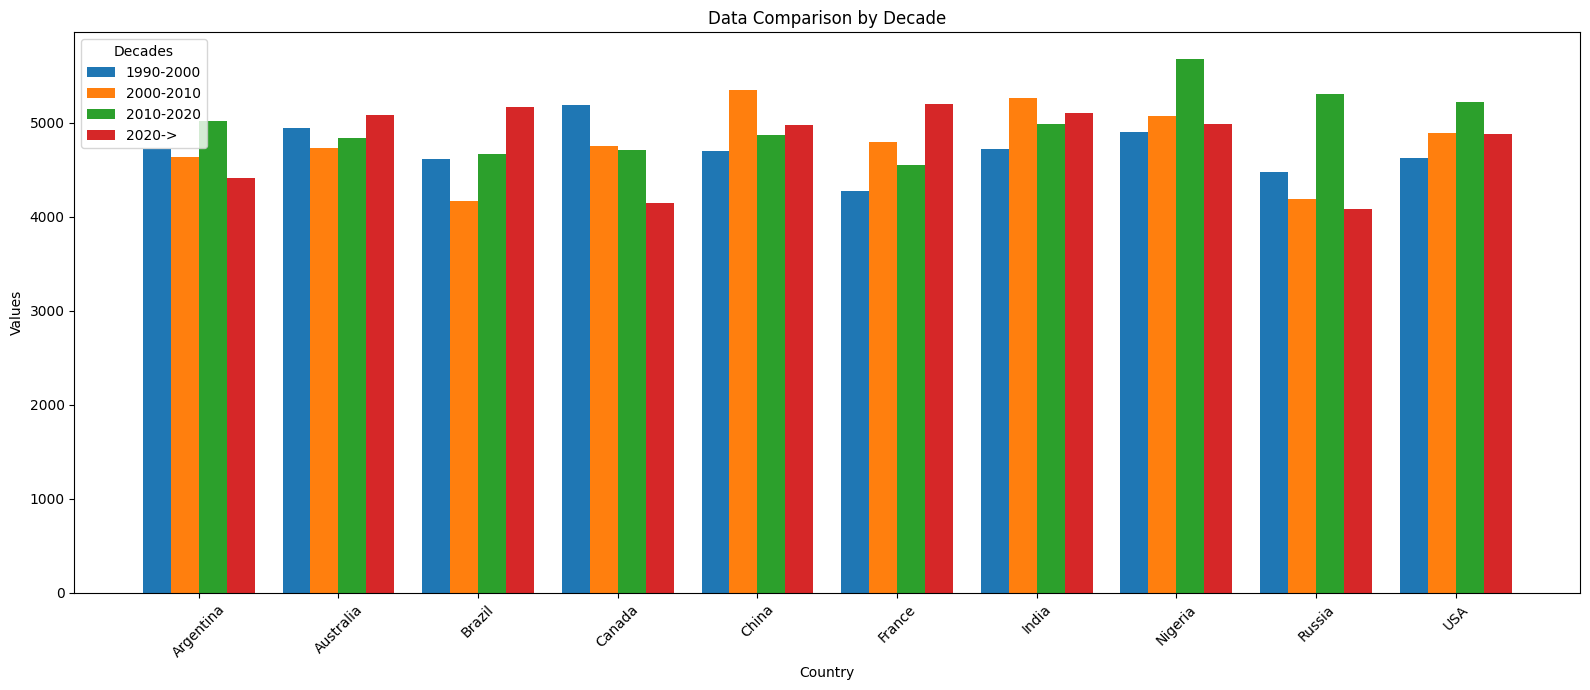

In [54]:
df.dropna(inplace=True)
by_countries_USD = df.pivot_table("Economic_Impact_Million_USD",index=["Country","Region","Year"],aggfunc=["sum"])
by_countries_USD = by_countries_USD.unstack().groupby("Country").mean()

plots_size = by_countries.shape[0]
grid = plt.GridSpec(plots_size,1)
fig = plt.figure(figsize=(20,50))
with_decades = by_countries_USD.T.reset_index().copy()
with_decades = with_decades.drop(columns=with_decades.columns[0:2])
with_decades["decade"] = 10*(with_decades["Year"] // 10)
with_decades = with_decades.drop(columns="Year").groupby("decade").mean()

display(with_decades)
plots = list()

for i in np.arange(plots_size):
    plots.append(fig.add_subplot(grid[i]))

for i in np.arange(plots_size):
    country = by_countries_USD.iloc[i].unstack()
    sorted_country = by_countries_USD.iloc[i].sort_values().reset_index()
    minimal = sorted_country.iloc[0,1:].values
    maximal = sorted_country.iloc[-1,1:].values

    plots[i].bar(country.columns,country.values.ravel())
    plots[i].bar(minimal[1],minimal[2],label="min")
    plots[i].bar(maximal[1],maximal[2],label="max")
    plots[i].xaxis.set_major_locator(plt.MultipleLocator(1))
    plots[i].set_title(by_countries_USD.index[i])
    plots[i].set_xlabel("Year")
    plots[i].set_ylabel("Economic Impact Million USD")
    plots[i].legend()

plt.show()
fig, ax = plt.subplots(figsize=(16, 7))
bar_w = 0.2  # Width of the bars

# Create an array for the x locations (excluding 'decade')
x = np.arange(len(with_decades.columns))  # Exclude 'decade' for x-ticks

# Plotting each decade's data
ax.bar(x - bar_w * 1.5, with_decades.iloc[0], width=bar_w, label="1990-2000")
ax.bar(x - bar_w * 0.5, with_decades.iloc[1], width=bar_w, label="2000-2010")
ax.bar(x + bar_w * 0.5, with_decades.iloc[2], width=bar_w, label="2010-2020")
ax.bar(x + bar_w * 1.5, with_decades.iloc[3], width=bar_w, label="2020->")

# Set country names as x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(with_decades.columns, rotation=45)  # Exclude 'decade'
ax.set_xlabel('Country')
ax.set_ylabel('Values')
ax.set_title('Data Comparison by Decade')
ax.legend(title='Decades')

plt.tight_layout()
plt.show()

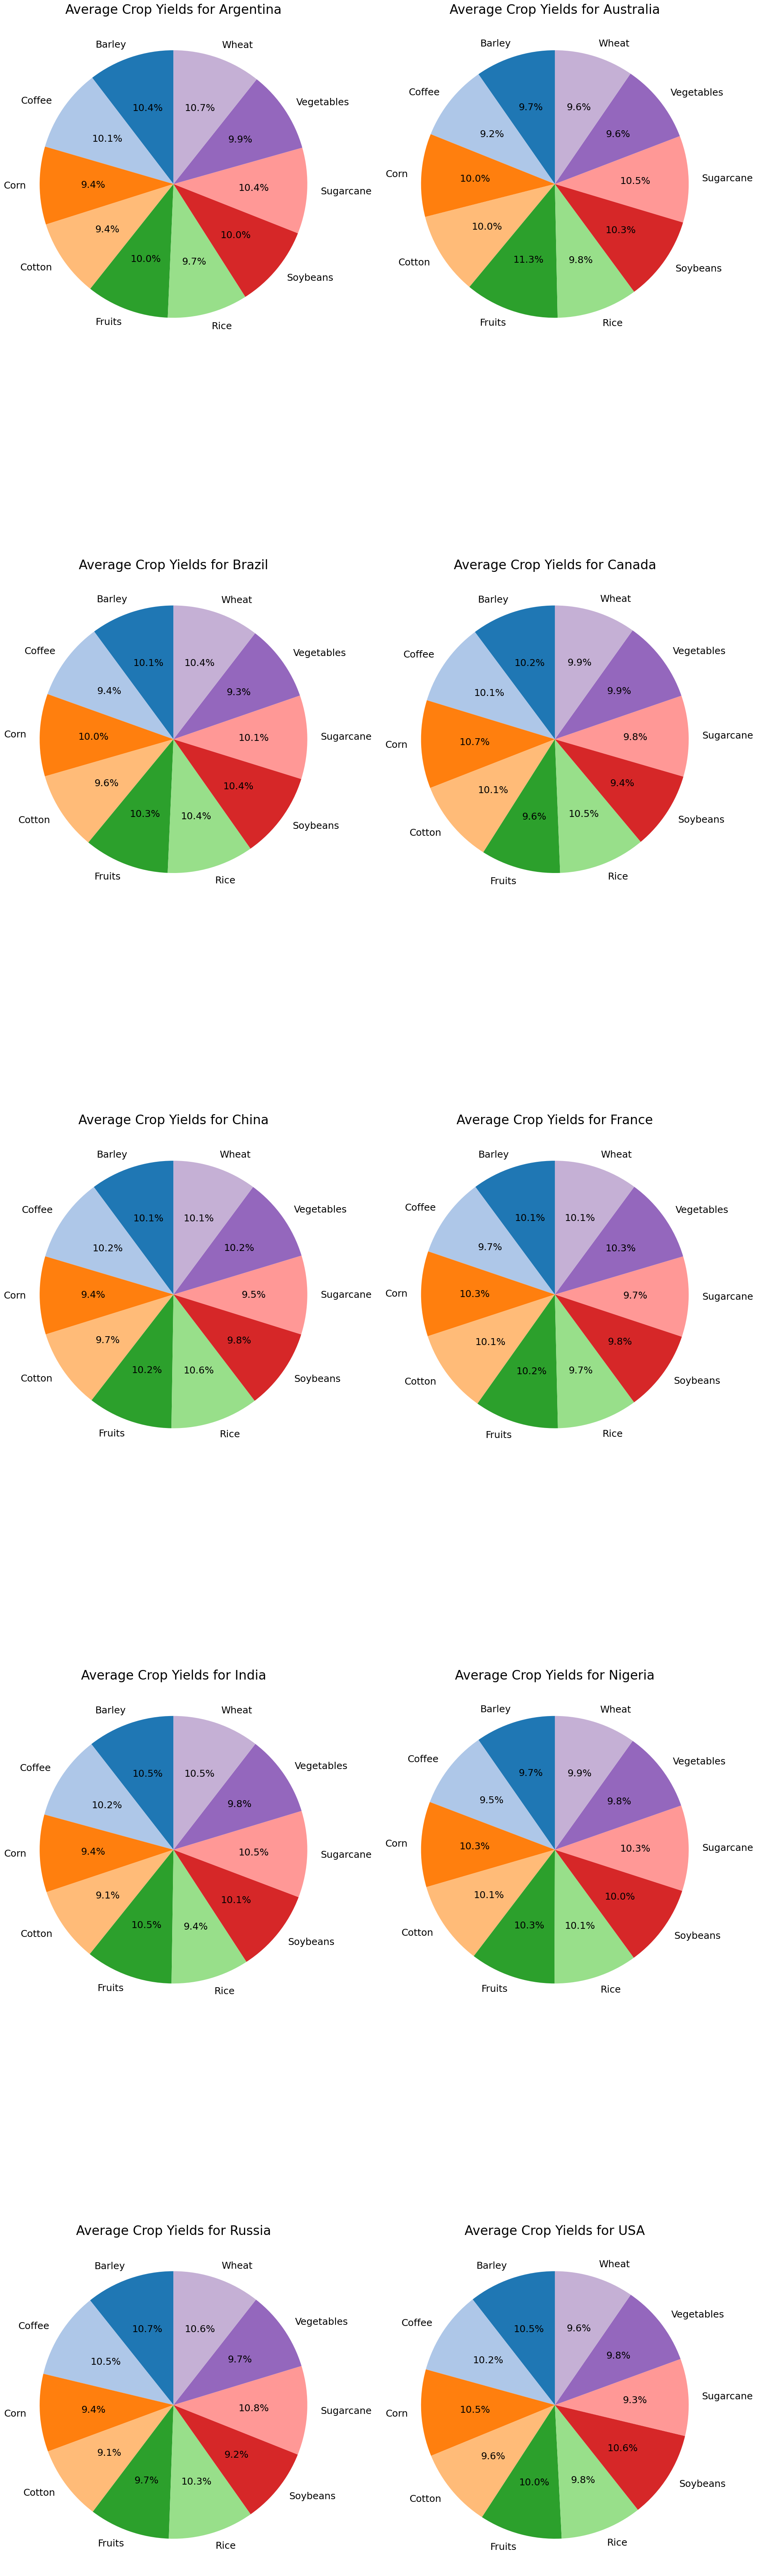

In [59]:
# By Crop Type
crop_filtered_df = pd.pivot_table(df, values=['Crop_Yield_MT_per_HA'], index=['Country'], columns=['Crop_Type'], aggfunc="mean")

countries = crop_filtered_df.index
num_countries = len(countries)
num_cols = 2
num_rows = math.ceil(num_countries / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 75))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each country and create a pie chart
for i, country in enumerate(countries):
    ax = axes[i]
    crop_yields = crop_filtered_df.loc[country].values
    crop_types = crop_filtered_df.columns.get_level_values(1)
    
    ax.pie(crop_yields, labels=crop_types, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors, textprops=dict(fontsize=18))
    ax.set_title(f'Average Crop Yields for {country}', fontdict=dict(fontsize=24))

plt.tight_layout()
plt.show()



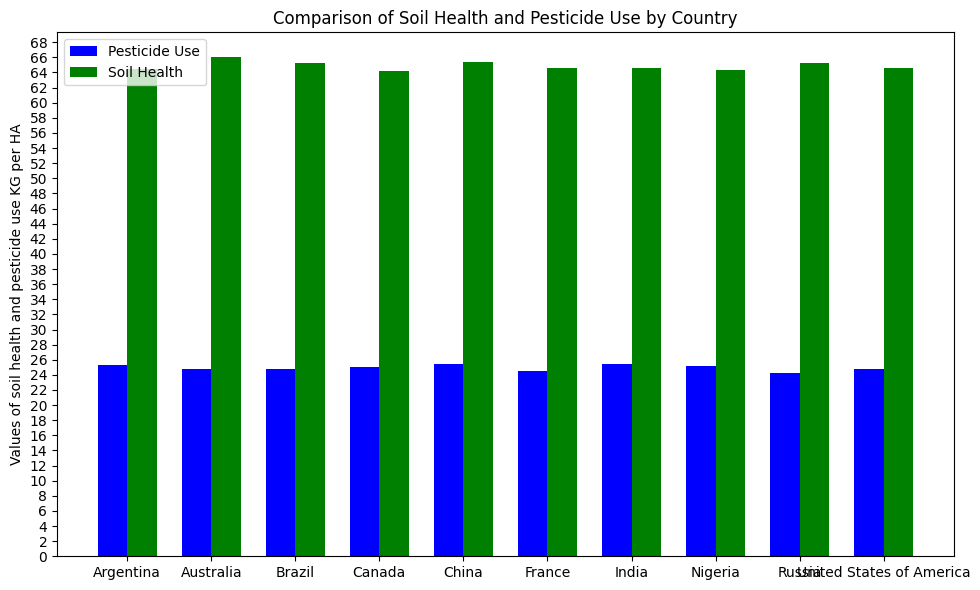

In [40]:
df.dropna()
by_countries = df.pivot_table(["Soil_Health_Index","Pesticide_Use_KG_per_HA"],index=["Country","Region"])

by_countries = by_countries.groupby("Country").mean()

bar_width = 0.35
x = range(len(by_countries.index))
plt.figure(figsize=(10,6))
plt.bar(x, by_countries['Pesticide_Use_KG_per_HA'], width=bar_width, label="Pesticide Use", color='b', align='center')
plt.bar([p + bar_width for p in x], by_countries['Soil_Health_Index'], width=bar_width, label="Soil Health", color='g', align='center')

plt.xticks([p + bar_width / 2 for p in x], by_countries.index)
plt.yticks(np.arange(0,70,2),np.arange(0,70,2))
plt.ylabel('Values of soil health and pesticide use KG per HA')
plt.title('Comparison of Soil Health and Pesticide Use by Country')
plt.legend()
plt.tight_layout()

In [42]:
by_regions = df.pivot_table(["Irrigation_Access_%","Crop_Yield_MT_per_HA"],index=["Region","Year"])

regions = df["Region"].unique().astype("str")

plots_size = regions.size
plots = list()
grid = plt.GridSpec(plots_size,1)
fig = plt.figure(figsize=(30,300))
for i in range(plots_size):
    plots.append(fig.add_subplot(grid[i]))
indx = pd.IndexSlice

for i in range(plots_size):
    region =  by_regions.loc[indx[regions[i]],:]


    width = 0.4  # Width of the bars
    x = np.arange(len(region.index))  # The x locations for the groups
    plots[i].bar(x - width/2, region["Irrigation_Access_%"], width, label="Irrigation Access")
    plots[i].bar(x + width/2, region["Crop_Yield_MT_per_HA"] * 15, width, label="Crop Yield MT/HA")
    plots[i].set_xticks(x)
    plots[i].set_xticklabels(region.index, rotation=45)
    
    plots[i].set_title(regions[i])
    plots[i].set_xlabel("years")
    plots[i].set_ylabel("MT/HA *15")
    plots[i].legend()

In [ ]:
df

Economic_Impact_Million_USD  \
Adaptation_Strategies                                             Crop Rotation   
Country                  Region                                                   
Argentina                Northeast                                   706.110392   
                         Northwest                                   605.330000   
                         Pampas                                      767.569189   
                         Patagonia                                   670.850435   
Australia                New South Wales                             705.229286   
                         Queensland                                  744.271915   
                         Victoria                                    703.361552   
                         Western Australia                           638.659804   
Brazil                   North                                       663.357115   
                         Northeast                                   672.287347   
                         South                                       700.167317   
                         Southeast                                   721.487500   
Canada                   British Columbia                            750.119756   
                         Ontario                                     721.187679   
                         Prairies                                    572.875200   
                         Quebec                                      725.226531   
China                    Central                                     783.211563   
                         East                                        763.854783   
                         North                                       705.459787   
                         South                                       658.088955   
France                   Grand Est                                   619.053556   
                         Ile-de-France                               797.085870   
                         Nouvelle-Aquitaine                          651.655283   
                         Provence-Alpes-Cote d’Azur                  657.841698   
India                    Maharashtra                                 589.264390   
                         Punjab                                      597.900566   
                         Tamil Nadu                                  783.516167   
                         West Bengal                                 650.656471   
Nigeria                  North Central                               702.287451   
                         North West                                  635.395636   
                         South East                                  666.218780   
                         South West                                  818.321071   
Russia                   Central                                     733.522326   
                         Northwestern                                627.128125   
                         Siberian                                    758.286415   
                         Volga                                       634.192264   
United States of America Midwest                                     602.903559   
                         Northeast                                   624.744717   
                         South                                       709.784889   
                         West                                        634.849000   

                                                                             \
Adaptation_Strategies                               Drought-resistant Crops   
Country                  Region                                               
Argentina                Northeast                               704.665556   
                         Northwest                               623.255854   
                         Pampas                                  560.259362   
        

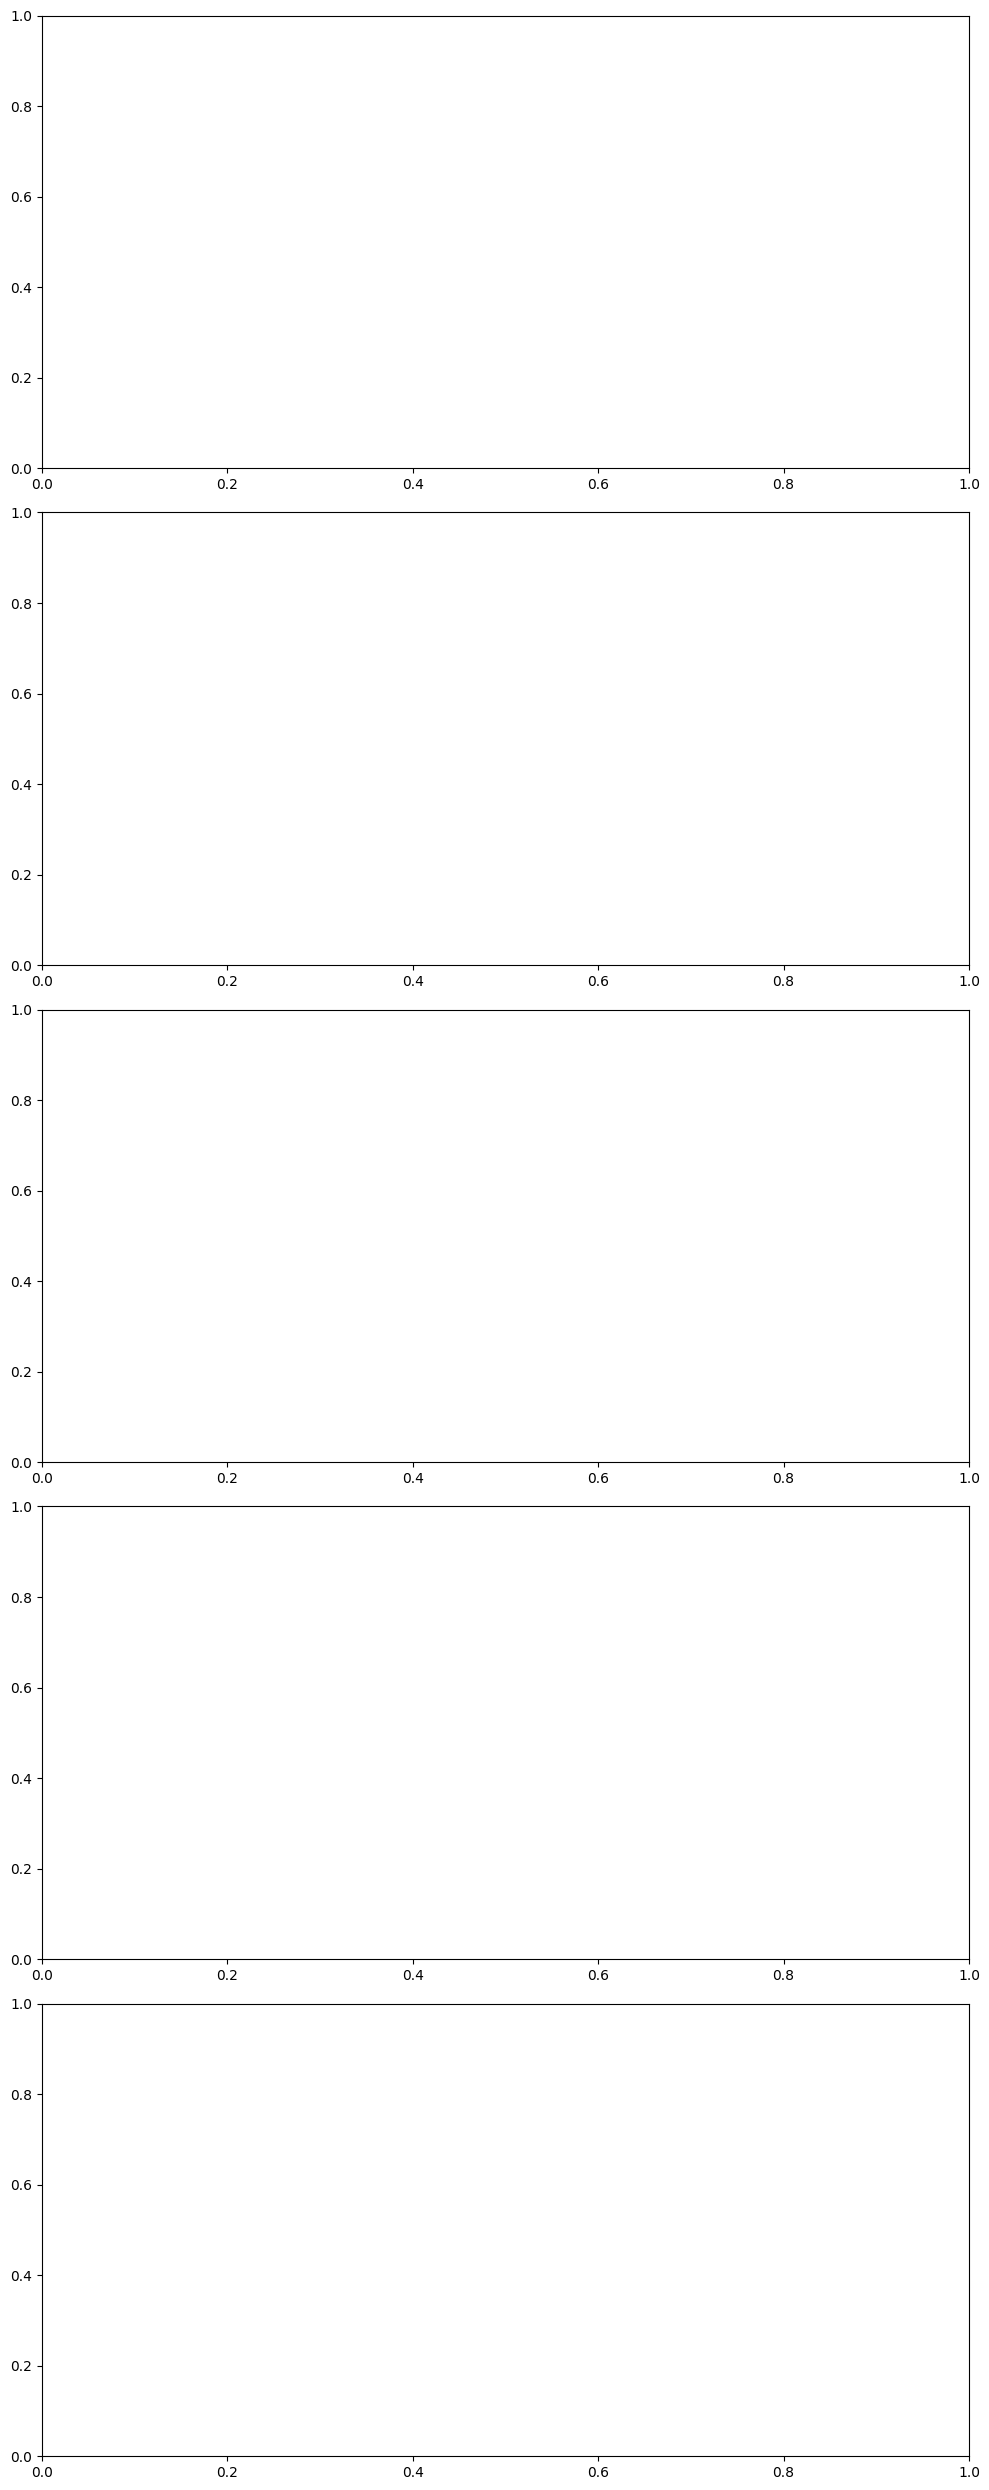

In [43]:
# By Adaptation_Strategies

grouped_df = pd.pivot_table(df, values=["Economic_Impact_Million_USD"], index=["Country", "Region"], columns=["Adaptation_Strategies"], aggfunc="mean")

plots_size = grouped_df.shape[1]
fig, ax = plt.subplots(nrows=plots_size, ncols=1, figsize=(10, plots_size * 5))

display(grouped_df)


plt.tight_layout()
plt.show()

In [ ]:
# Graph comparing the economic impact of regions of countries